##다중 분류 실행 

In [1]:
#import 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [2]:
#data_load
red = pd.read_csv('/content/winequality-red.csv',sep = ',')
white = pd.read_csv('/content/winequality-white.csv',sep = ';')

display(red)
display(white)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
#data type 추가 
red['type'] = 0
white['type'] = 1



#data concat 
wine = pd.concat([red,white])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [4]:
print(wine.quality.value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


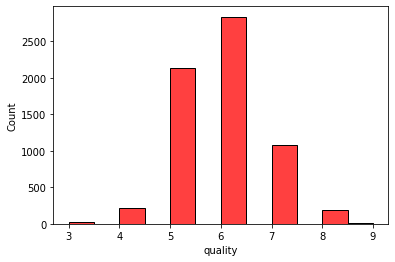

'\n 3 4 5 = bad\n 6 = normal\n 7 8 9  = good\n \n'

In [5]:
#시각화 
sns.histplot(wine['quality'],color = 'red',binwidth=0.5)
plt.show() 
#label 의 편차 가 큰 케이스 라 학습 이 너무 힘들다 
#많은 곳에 밀집된 5 6 7 을 더 많이 예측 할것이다.
#데이터를 증폭 시키거나 / 그룹화 를 시킨다 (345/6/78) 을 하나로 묶는다 
'''
 3 4 5 = bad
 6 = normal
 7 8 9  = good
 
'''

In [6]:
#그룹화 시키기
wine.loc[wine['quality'] <= 5 ,'new_quality'] = 0
wine.loc[wine['quality'] == 6 ,'new_quality'] = 1
wine.loc[wine['quality'] >= 7 ,'new_quality'] = 2

In [7]:
wine.new_quality.value_counts()

1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64

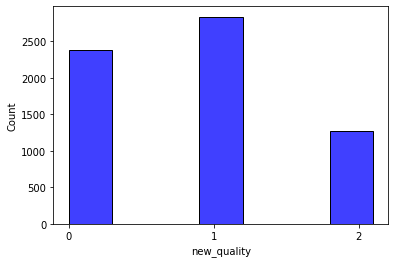

In [8]:
sns.histplot(wine['new_quality'],binwidth = 0.3,color = 'blue')
plt.xticks(ticks=[0,2,1])
plt.show()

In [9]:
#quality 데이터 도 지우기 시험문제

del wine['quality']
display(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,2.0


In [10]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,2.0


In [11]:
#정규화 시키기 
'''
독립 종속을 전부다 정규화 하는 이유

분류 
값 자체 의 특징이 안달라 지기 떄문에 종속 변수도 정규화 해도 된다.,

회귀
'''

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())


In [12]:
wine_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.0,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.0,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.0,0.5
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,1.0,0.5
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,1.0,0.0
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,1.0,0.5
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,1.0,1.0


In [13]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,2.0


In [14]:
print(wine_norm.new_quality[:10])
print(wine.new_quality[:10])

0    0.0
1    0.0
2    0.0
3    0.5
4    0.0
5    0.0
6    0.0
7    1.0
8    1.0
9    0.0
Name: new_quality, dtype: float64
0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
6    0.0
7    2.0
8    2.0
9    0.0
Name: new_quality, dtype: float64


In [15]:
#shuffle
wine_shuffle = wine_norm.sample(frac = 1)

In [16]:
#numpy 
wine_np = wine_shuffle.to_numpy()

In [17]:
#train_test_index

train_ratio = 0.8
train_index = int(wine_np.shape[0] * train_ratio)

In [32]:
#split
train_x,train_y = wine_np[:train_index,:-1] , wine_np[:train_index,-1:]
test_x,test_y = wine_np[train_index: , :-1] , wine_np[train_index:,-1:]

In [33]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(5197, 12)
(5197, 1)
(1300, 12)
(1300, 1)


In [34]:
#onehotvector
train_y_to_categorical = tf.keras.utils.to_categorical(train_y,num_classes =3)
test_y_to_categorical = tf.keras.utils.to_categorical(test_y,num_classes = 3)

In [35]:
train_y_to_categorical

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [36]:
test_y_to_categorical

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [37]:
#model 구축
model = tf.keras.Sequential([
                  tf.keras.layers.Dense(units = 48 , activation='swish',input_shape = (12,)),
                  tf.keras.layers.Dense(units = 24,activation = 'swish'),
                  tf.keras.layers.Dense(units = 12 , activation = 'swish'),
                  tf.keras.layers.Dense(units = 3 , activation = 'softmax'),
])

In [38]:
#model 최적화 
model.compile(optimizer= tf.keras.optimizers.Adam(),loss = 'categorical_crossentropy',metrics = ['accuracy']) #sparse_crossentropy = 12345 


In [39]:
#model 학습 
history = model.fit(train_x, train_y_to_categorical,
                                  epochs = 200, 
                                  batch_size = 32,
                                  validation_split = 0.2,
                                  callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 3)
                                  )
#validation set 은 학습 과 테스트 를 나누고 학습 하면서 train data 를 한번더 나눈다... -> 좋은 기능 


Epoch 1/200
130/130 [==============================] - 1s 3ms/step - loss: 0.6493 - accuracy: 0.7950 - val_loss: 0.4931 - val_accuracy: 0.8048
Epoch 2/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.8030 - val_loss: 0.4662 - val_accuracy: 0.8048
Epoch 3/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8047 - val_loss: 0.4143 - val_accuracy: 0.8212
Epoch 4/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8112 - val_loss: 0.3993 - val_accuracy: 0.8183
Epoch 5/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8092 - val_loss: 0.3959 - val_accuracy: 0.8173
Epoch 6/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8027 - val_loss: 0.3851 - val_accuracy: 0.8269
Epoch 7/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8143 - val_loss: 0.3819 - val_accuracy: 0.8298

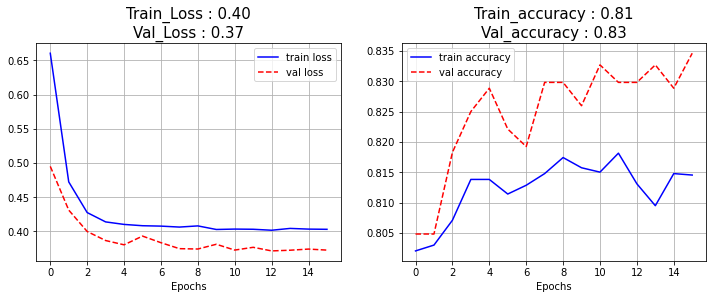

In [25]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss = history.history['loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], 'b-', label = 'train loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val loss')
plt.xlabel('Epochs')

plt.title("Train_Loss : {:.2f}\nVal_Loss : {:.2f}".\
          format(loss[-1], val_loss[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], 'b-', label = 'train accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'val accuracy')
plt.xlabel('Epochs')

plt.title("Train_accuracy : {:.2f}\nVal_accuracy : {:.2f}".\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.show()

In [41]:
pred_y = model.predict(test_x)
print(pred_y[:10])

pred_y_round = np.round(pred_y,2)
print(pred_y_round[:10])

pred_y_argmax = np.argmax(pred_y_round, axis = 1)
print(pred_y_argmax[:10])
print(test_y_to_categorical)
test_y_argmax = np.argmax(test_y_to_categorical,axis = 1)
print(test_y_argmax[:10])

print(np.mean(np.equal(pred_y_argmax,test_y_argmax)))

[[9.8572469e-01 1.4274908e-02 3.2489783e-07]
 [7.7270454e-01 2.2729364e-01 1.8744845e-06]
 [9.7308016e-01 2.6919002e-02 7.6320180e-07]
 [9.9600273e-01 3.9972547e-03 3.9831283e-10]
 [9.3209374e-01 6.7906030e-02 2.0083159e-07]
 [9.8378295e-01 1.6216140e-02 9.2406026e-07]
 [8.0498022e-01 1.9501173e-01 8.0334921e-06]
 [7.6952511e-01 2.3004338e-01 4.3152677e-04]
 [8.0055612e-01 1.9935197e-01 9.1882292e-05]
 [9.1844118e-01 8.1558689e-02 1.0485859e-07]]
[[0.99 0.01 0.  ]
 [0.77 0.23 0.  ]
 [0.97 0.03 0.  ]
 [1.   0.   0.  ]
 [0.93 0.07 0.  ]
 [0.98 0.02 0.  ]
 [0.8  0.2  0.  ]
 [0.77 0.23 0.  ]
 [0.8  0.2  0.  ]
 [0.92 0.08 0.  ]]
[0 0 0 0 0 0 0 0 0 0]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[0 0 0 0 0 0 0 0 1 0]
0.8215384615384616
